# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import importlib
import seaborn as sns
import gc  # garbage collector
import os

from typing import List

import utils as dp  # own functions and logic
importlib.reload(dp)  # this makes it so that 
                      # the file with our functions is re-read every time, 
                      # in case we have made modifications

<module 'utils' from '/home/andreas/Nextcloud/Dokumente/Uni/Module/3sem-EPFL/ada/Project/ada-2024-project-thedataminions/analysis/utils.py'>

# Configure path to data files

In [2]:
# define the path to the folder where the YouNiverse dataset is stored here

# when adding your own path, don't remove the existing path, just comment it
# in this way, everyone can quickly uncomment their own path
dataset_root_path = "/media/andreas/Backup Plus/Ada/youniverse_dataset/"   #andreas
#dataset_root_path = "D:/ada_project/dataset/"                                    #mila
# dataset_root_path = "/Volumes/DISQUE_SAUVEGARDE_MANON_LANDRIEUX/dataset/"  #manon
# dataset_root_path = "/Volumes/Backup/Youniverse_dataset/" #Lou-Anne 

# Preprocessing

## Loading the data - done in order to know how the data looks like

In [3]:
# load channel data (no chunks needed, as the file is not very large)


df_channels = pd.read_csv(dataset_root_path + "df_channels_en.tsv.gz", compression="infer", sep="\t") 

In [4]:
# load a small part of video and comment data, to try functions on them etc.
# these datasets should not be used for calculations, as they don't contain all the data

# load (first 100000 rows of) video data

df_videos = pd.read_json(dataset_root_path + "yt_metadata_en.jsonl.gz", compression="infer", lines=True, nrows=100000) 

# load (first 1000000 rows of) comment data

df_comments = pd.read_csv(dataset_root_path + "youtube_comments.tsv.gz", compression="infer", sep="\t", nrows=1000000)

In [5]:
def videos_in_chunks( chunksize: int = 100000) -> pd.io.json._json.JsonReader:
    """
    Returns a Json reader which can be iterated through, to get chunks of the (unfiltered) video dataset.

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the Json reader
    """
    return pd.read_json(dataset_root_path + "yt_metadata_en.jsonl.gz", 
                        compression="infer", lines=True, chunksize=chunksize, )
                        # nrows=1000000, )   # uncomment this to only use the first million videos, for testing
                                           # (remove the paranthesis above as well)

def comments_in_chunks(chunksize: int = 1000000) -> pd.io.parsers.readers.TextFileReader:
    """
    Returns a CSV reader which can be iterated through, to get chunks of the (unfiltered) comment dataset.

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the CSV reader
    """
    return pd.read_csv(dataset_root_path + "youtube_comments.tsv.gz", 
                       compression="infer", sep="\t", chunksize=chunksize, )
                    #    nrows = 10000000)  # uncomment this to only use the first 10 million comments, for testing
                                            # (remove the paranthesis above as well)

## Filtering for NaNs,empty values and possible spaces

## 1. Analyzing if filtering is needed

In [8]:
#to create the filepath for the different get entries below , need to have "../generated_data" which exists:

# Define the path to the directory
output_dir = os.path.join(dataset_root_path, "../generated_data")

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

### a. Youtube Comments 

In [28]:
# get the entries of the comment dataframe which have a NaN value, empty string or space in any column

nans_empty_space_comments_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_comment_dataset.csv"  # path to file with nans in comment dataset

try:  # try to read the data from file
    df_nans_empty_space_in_comments = pd.read_csv(nans_empty_space_comments_filepath)
except FileNotFoundError:  # if the file is not found...
    # ... then generate the file
    df_nans_empty_space_in_comments = dp.run_simple_function_on_chunks_concat(comments_in_chunks(1000000), 
                                                                              lambda x: dp.get_na_empty_space_entries(x, "any", reverse=False),
                                                                              print_time=(1000000, 8600000000))
    
    df_nans_empty_space_in_comments.to_csv(nans_empty_space_comments_filepath, index=False)


Going through chunk 0...
The first 1000000 entries have been processed. 8599000000 left.
3.981 secs per chunk on average. Meaning  570.603 minutes left.
Going through chunk 1...
The first 2000000 entries have been processed. 8598000000 left.
5.661 secs per chunk on average. Meaning  811.284 minutes left.
Going through chunk 2...
The first 3000000 entries have been processed. 8597000000 left.
4.693 secs per chunk on average. Meaning  672.491 minutes left.
Going through chunk 3...
The first 4000000 entries have been processed. 8596000000 left.
4.201 secs per chunk on average. Meaning  601.808 minutes left.
Going through chunk 4...
The first 5000000 entries have been processed. 8595000000 left.
3.921 secs per chunk on average. Meaning  561.649 minutes left.
Going through chunk 5...
The first 6000000 entries have been processed. 8594000000 left.
3.706 secs per chunk on average. Meaning  530.758 minutes left.
Going through chunk 6...
The first 7000000 entries have been processed. 8593000000

KeyboardInterrupt: 

### b. Videos (youtube metadata)

In [ ]:
# get the entries of the video dataframe which have a NaN value, empty string or space in any column

nans_empty_space_videos_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_video_dataset.csv"  # path to file with nans in video dataset

try:  # try to read the data from file
    df_nans_empty_space_in_videos = pd.read_csv(nans_empty_space_videos_filepath)
except FileNotFoundError:  # if the file is not found...
    # ... then generate the file
    df_nans_empty_space_in_videos = dp.run_simple_function_on_chunks_concat(videos_in_chunks(), 
                                                                            lambda x: dp.get_na_empty_space_entries(x, "any", reverse=False),
                                                                            print_time=False)
    df_nans_empty_space_in_videos.to_csv(nans_empty_space_videos_filepath, index=False)

KeyboardInterrupt: 

### c. Channels

In [ ]:
# get the entries of the channel dataframe which have a NaN value, empty string or space in any column

nans_empty_space_channels_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_channel_dataset.csv"  # path to file with nans in channel dataset

try:  # try to read the data from file
    df_nans_empty_space_in_channels = pd.read_csv(nans_empty_space_channels_filepath)
except FileNotFoundError:  # if the file is not found...
    # ... then generate the file
    df_nans_empty_space_in_channels = dp.get_na_empty_space_entries(df_channels, "any", reverse=False)

    df_nans_empty_space_in_channels.to_csv(nans_empty_space_channels_filepath, index=False)

/home/andreas/Nextcloud/Dokumente/Uni/Module/3sem-EPFL/ada/Project/ada-2024-project-thedataminions/analysis/utils.py:403: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'


In [64]:
#display to be sure this are not empty, alarming us that some data need to be discard.

display(df_nans_empty_space_in_comments)
display(df_nans_empty_space_in_videos)
display(df_nans_empty_space_in_channels)

NameError: name 'df_nans_empty_space_in_comments' is not defined

### Analysis

One can see that a lot of data is incomplete, and that a cleaning is needed in order to make a good analysis. As dataframes that ar empty / incomplete doens't make sense to keep, we will discard all of it. The dataframes are large enough to allow that, and zthe analysis will still be accurate.

In [ ]:
# delete the dataframes with nans, as we are done with the analysis at this point and no longer need them.

del df_nans_empty_space_in_comments
del df_nans_empty_space_in_videos
del df_nans_empty_space_in_channels


gc.collect()

1187

## 2. Cleaning of files: replacing empty character '' with NaN and remove all rows containing NaN

**df_channels** is treated separetly because the file is much smaller, it doesn't need to be treated in chuncks.


In [85]:
#clean df_channel and save 

channels_clean_filepath = dataset_root_path + "../generated_data/df_channels_clean.csv"

try:
    df_channels_clean = pd.read_csv(channels_clean_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_channels_clean = dp.clean(df_channels, save=False)
    df_channels_clean.to_csv(channels_clean_filepath, index=False)


display(len(df_channels_clean))
display(len(df_channels))

#one can understand that the new dataframe that will be using from now on will be df_channels_clean

Read data from file


136331

136470

When cleaning **chunks**, we need to use another function run_simple_function_on_chuncks_save_csv, that will iterate and clean the dataframe chunks after chunks, allowing faster code. Then, the new files are save in another dataframe. Similarly, only the clean dataframe will be used afterwards.

In [86]:
# clean the other two dataframes

comments_clean_filepath = dataset_root_path + "../generated_data/df_comments_clean.csv"

if os.path.isfile(comments_clean_filepath):
    print("File already exists, no need to generate again. Delete or rename the file to regenerate it.")
else:
    dp.run_simple_function_on_chunks_save_csv(reader=comments_in_chunks(1000000), 
                                              fct=lambda df: dp.clean(df, save=False), 
                                              filename=comments_clean_filepath,
                                              index=False,
                                              every=30,
                                              overwrite=False,
                                              print_time=(1000000, 8600000000))

videos_clean_filepath = dataset_root_path + "../generated_data/df_videos_clean.csv"

if os.path.isfile(videos_clean_filepath):
    print("File already exists, no need to generate again. Delete or rename the file to regenerate it.")
else:
    dp.run_simple_function_on_chunks_save_csv(reader=videos_in_chunks(100000), 
                                              fct=lambda df: dp.clean(df, save=False), 
                                              filename=videos_clean_filepath,
                                              index=False,
                                              every=15,
                                              overwrite=False,
                                              print_time=(100000, 72924794))

File already exists, no need to generate again. Delete or rename the file to regenerate it.
File already exists, no need to generate again. Delete or rename the file to regenerate it.


In [6]:
# define new readers, as videos_in_chunks and comments_in_chunks used the uncleaned versions:

def videos_in_chunks_clean(chunksize: int = 100000) -> pd.io.json._json.JsonReader:
    """
    Returns a Json reader which can be iterated through, to get chunks of the video dataset, with nans etc removed (cleaned).

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the Json reader
    """
    return pd.read_csv(videos_clean_filepath,
                       compression="infer", chunksize=chunksize, )
                        #nrows=1000000, )   # uncomment this to only use the first million videos, for testing
                                          # (remove the paranthesis above as well)

def comments_in_chunks_clean(chunksize: int = 1000000) -> pd.io.parsers.readers.TextFileReader:
    """
    Returns a CSV reader which can be iterated through, to get chunks of the (unfiltered) comment dataset.

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the CSV reader
    """
    return pd.read_csv(comments_clean_filepath,
                       compression="infer", chunksize=chunksize, )
                         #nrows = 10000000)  # uncomment this to only use the first 10 million comments, for testing
                                            # (remove the paranthesis above as well)

# Why News and Politics ?

With this analysis we want to investigate how popular the News&Politics category is both in videos and channels. 
News and Politics were chosen as it is a interesting subject to see if groups are isolated. But what is its position among all Youtube categories?

#### 1. Distribution of categories for the channels

Loaded data from file


,category_cc,number_of_channels
0,Autos & Vehicles,3705
1,Comedy,3767
2,Education,7803
3,Entertainment,22944
4,Film and Animation,6875
5,Gaming,20141
6,Howto & Style,11875
7,Music,24283
8,News & Politics,2263
9,Nonprofits & Activism,969


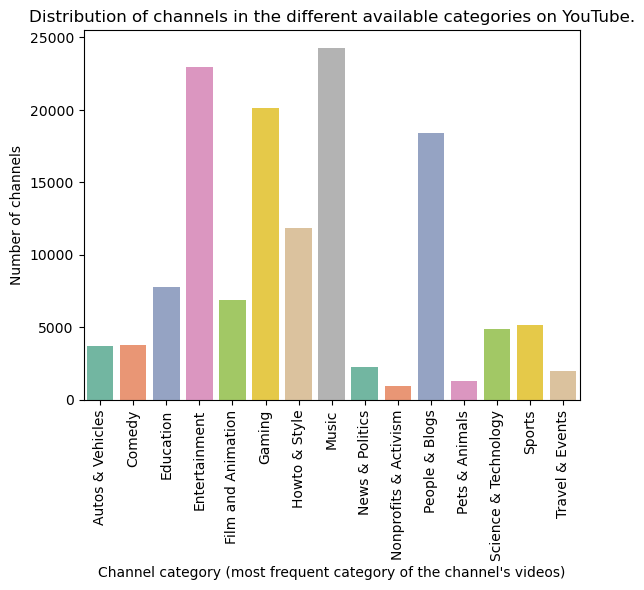

In [88]:
channels_by_category_filepath = dataset_root_path + "../generated_data/channel_count_per_category.csv"

try:  # try to read data from file
    channels_per_category = pd.read_csv(channels_by_category_filepath)
    print("Loaded data from file")
except FileNotFoundError:  # if file does not exist, generate it and save
    channels_per_category = df_channels_clean.groupby('category_cc').agg(number_of_channels=('category_cc', 'size')).reset_index()
    channels_per_category.to_csv(channels_by_category_filepath, index=False)

display(channels_per_category)


ax = sns.barplot(x="category_cc", y="number_of_channels", data=channels_per_category,hue="category_cc", palette='Set2')
plt.xticks(rotation=90)
plt.title("Distribution of channels in the different available categories on YouTube.")
plt.xlabel("Channel category (most frequent category of the channel's videos)")
plt.ylabel("Number of channels")
plt.show()

 
One can see that the number of channels corresponding to News&Politics category is very low ! This category is even one of the smallest. What about the number of corresponding videos ?

#### 1. Distribution of categories for the channels

Data read from file
    Unnamed: 0               category  total_count
0            0          Entertainment   10792801.0
1            1                 Gaming   12536769.0
2            2                  Music    7289802.0
3            3        News & Politics    7551328.0
4            4         People & Blogs    5193647.0
5            5          Howto & Style    3547454.0
6            6        Travel & Events     954502.0
7            7   Science & Technology    2137297.0
8            8                 Comedy     895662.0
9            9                 Sports    3729555.0
10          10              Education    3146188.0
11          11       Film & Animation    1928750.0
12          12         Pets & Animals     536281.0
13          13       Autos & Vehicles    1977948.0
14          14  Nonprofits & Activism     610451.0
15          15                  Shows         41.0
16          16                 Movies          5.0


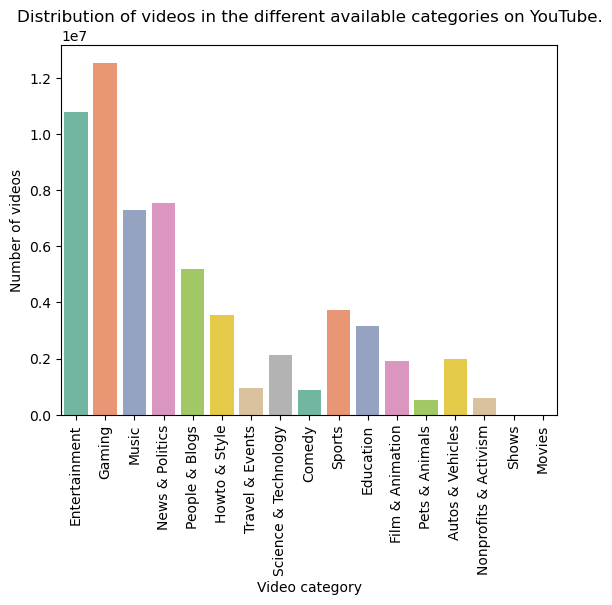

In [89]:
#distribution categories of videos over the whole (cleaned) dataset per chunck

# Define a function that processes a single chunk
def count_videos_by_category(chunk):
    
    # Count videos in each category within the chunk
    category_counts = chunk['categories'].value_counts().to_frame().T  # Get counts and transpose for one-row DataFrame
    category_counts.columns.name = None  # Remove column name for easy concatenation
    return category_counts

videos_by_category_filepath = dataset_root_path + "../generated_data/video_count_by_category.csv"

try:  # try to read the data from file
    videos_per_category_counts_total = pd.read_csv(videos_by_category_filepath)
    print("Data read from file")
except FileNotFoundError:  # otherwise, generate it and save

    # Apply the function to all chunks and get the results concatenated
    videos_per_category_counts_per_chunk = dp.run_simple_function_on_chunks_concat(
        videos_in_chunks_clean(chunksize=100000), 
        count_videos_by_category,
        print_time=(100000, 72924794)
        )

    # Sum the counts across all chunks to get the total count of videos per category
    videos_per_category_counts_total = videos_per_category_counts_per_chunk.sum().to_frame(name='total_count').reset_index()
    videos_per_category_counts_total.columns = ['category', 'total_count']

    videos_per_category_counts_total.to_csv(videos_by_category_filepath,)  # save the created dataframe so we don't have to generate it again


# Display the final distribution
print(videos_per_category_counts_total)

ax = sns.barplot(x="category", y="total_count", hue='category', legend=False, data=videos_per_category_counts_total, palette='Set2')
plt.xticks(rotation=90)
plt.title("Distribution of videos in the different available categories on YouTube.")
plt.xlabel("Video category")
plt.ylabel("Number of videos")
plt.show()

### Analysis 

It is apparent that there are fewer News & Politics channels compared to other categories. However, the proportion of News & Politics videos is much higher. This suggests that News & Politics channels are relatively active in posting content.

Therefore, studying News & Politics videos seems to be a worthwhile pursuit, even though it may not fully represent the broader YouTube community. One might also question whether a smaller category, like News & Politics, could be even more interesting than a larger one. A smaller category may become more isolated, potentially forming its own bubbles.




In [90]:
# delete the datasets, as we don't need them anymore

del videos_per_category_counts_total
del channels_per_category

## Filtering the datasets to our needs - News & Politics

### Filtering **videos** by category 'News & Politics'

In [7]:
# filter the video dataframe to only include videos from n&p category

videos_in_news_pol_filepath = dataset_root_path + "../generated_data/videos_in_news_pol.csv"

if os.path.isfile(videos_in_news_pol_filepath):  # if the file already exists
    print("File already exists, no need to generate again.\nDelete or rename the existing file in order to regenerate it.")
else:  # if not, generate the file. The data is directly saved to a new dataframe, 
       # because it would be to big to load in memory at once
    dp.run_simple_function_on_chunks_save_csv(videos_in_chunks_clean(chunksize=100000),
                                              lambda x: x[x.categories == "News & Politics"], 
                                              filename=videos_in_news_pol_filepath,
                                              index=False,
                                              overwrite=False,  # will not overwrite existing files
                                              every=15,  # will save to the csv every 15 chunks
                                              print_time=(100000, 72924794))
    
# a new filtered file is saved, this dataframe will be used from now on.

File already exists, no need to generate again.
Delete or rename the existing file in order to regenerate it.


In [93]:
# load the (large) csv file that was just written, containing the videos in news and politics, in chunks, 
# and print the head of the first chunk and the shape of each chunk (this is just to show that it worked)

print("News and politics videos:\n")

total_length = 0
for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):
    
    if i == 0:
        print(f"Head of chunk 0: ")
        print(chunk[chunk.channel_id == "UCupvZG-5ko_eiXAupbDfxWw"])

        display(chunk.head())
        print("The shapes of all chunks:")
    print(f"Shape of chunk number {i}: {chunk.shape}")
    total_length += chunk.shape[0]

print(f"In total {total_length} rows, which takes up {i+1} chunks.")
del chunk

print(f"{gc.collect()} garbages collected.")

News and politics videos:

Head of chunk 0: 
Empty DataFrame
Columns: [categories, channel_id, crawl_date, description, dislike_count, display_id, duration, like_count, tags, title, upload_date, view_count]
Index: []


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:42.593675,retrogamer3.com,16.0,dfa8RRkKoa4,9251,25.0,"RetroGamer3,Live Stream,politics,Trump",Retrogamer3 Political Stream,2018-08-23 00:00:00,478.0
1,News & Politics,UCzWLsxDD373D4tY8kN-0LGQ,2019-11-05 00:42:33.012228,What are the forces at work that have created ...,0.0,_dIIEMvH86k,309,9.0,"NWO,Ebola,Ukraine,Mainstream,Media,Pyschology",Adam Curtis describes the Surkow Strategy of M...,2015-01-04 00:00:00,865.0
2,News & Politics,UCzVBu6oqlrAix0oq9T2rBFg,2019-11-19 20:40:22.403775,Social Media:\n\nFacebook.com/thebookoflaura\n...,89.0,eWXefhNB2po,707,625.0,"michael jackson,lyrics,music video,court,child...",my thoughts on the michael jackson documentary.,2019-04-24 00:00:00,12780.0
3,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:47:10.520209,👕 Order your shirts here: https://Teespring.co...,195.0,MBgzne7djFU,378,47027.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",Elizabeth Warren Gets a Big Surprise at the Ai...,2019-10-03 00:00:00,374711.0
4,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:46:16.481889,👕 Order your shirts here: https://Teespring.co...,114.0,AbH3pJnFgY8,278,36384.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",No More Twitter? 😂,2019-10-02 00:00:00,245617.0


The shapes of all chunks:
Shape of chunk number 0: (100000, 12)
Shape of chunk number 1: (100000, 12)
Shape of chunk number 2: (100000, 12)
Shape of chunk number 3: (100000, 12)
Shape of chunk number 4: (100000, 12)
Shape of chunk number 5: (100000, 12)
Shape of chunk number 6: (100000, 12)
Shape of chunk number 7: (100000, 12)
Shape of chunk number 8: (100000, 12)
Shape of chunk number 9: (100000, 12)
Shape of chunk number 10: (100000, 12)
Shape of chunk number 11: (100000, 12)
Shape of chunk number 12: (100000, 12)
Shape of chunk number 13: (100000, 12)
Shape of chunk number 14: (100000, 12)
Shape of chunk number 15: (100000, 12)
Shape of chunk number 16: (100000, 12)
Shape of chunk number 17: (100000, 12)
Shape of chunk number 18: (100000, 12)
Shape of chunk number 19: (100000, 12)
Shape of chunk number 20: (100000, 12)
Shape of chunk number 21: (100000, 12)
Shape of chunk number 22: (100000, 12)
Shape of chunk number 23: (100000, 12)
Shape of chunk number 24: (100000, 12)
Shape of 

/tmp/ipykernel_6747/187265695.py:7: DtypeWarning: Columns (5,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):


Shape of chunk number 64: (100000, 12)


/tmp/ipykernel_6747/187265695.py:7: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):


Shape of chunk number 65: (100000, 12)
Shape of chunk number 66: (100000, 12)
Shape of chunk number 67: (100000, 12)
Shape of chunk number 68: (100000, 12)


/tmp/ipykernel_6747/187265695.py:7: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):


Shape of chunk number 69: (100000, 12)
Shape of chunk number 70: (100000, 12)


/tmp/ipykernel_6747/187265695.py:7: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):


Shape of chunk number 71: (100000, 12)
Shape of chunk number 72: (100000, 12)
Shape of chunk number 73: (100000, 12)
Shape of chunk number 74: (100000, 12)
Shape of chunk number 75: (51328, 12)
In total 7551328 rows, which takes up 76 chunks.
5232 garbages collected.


## Extracting just the *Video IDs* of the Videos in News & Politics in as a Series
(In order to be able to use this without loading the entire Videos in News & Politics DataFrame)

In [8]:
videos_news_pol_display_ids_filepath = dataset_root_path + "../generated_data/videos_news_pol_display_ids.csv"

try:
    df_videos_news_pol_display_ids = pd.read_csv(videos_news_pol_display_ids_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_videos_news_pol_display_ids = dp.run_simple_function_on_chunks_concat(pd.read_csv(videos_in_news_pol_filepath, chunksize=100000),
                                                                                 fct = lambda df: df['display_id'],
                                                                                 print_time=True
                                                                                 )['display_id']
    df_videos_news_pol_display_ids.to_csv(videos_news_pol_display_ids_filepath, index=False)

Read data from file


### Filtering **channels** by category News & Politics

In [104]:
#filter channels dataset to only include n&p

# Note: because the channel dataset is much smaller than the video dataset, we don't need to worry about chunks here
# Also, the results can be saved in a single file without a problem.

channels_news_pol_filepath = dataset_root_path + "../generated_data/channels_in_news_pol.csv"

try:
    df_channels_news_pol = pd.read_csv(channels_news_pol_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_channels_news_pol = df_channels_clean[df_channels_clean.category_cc == "News & Politics"]
    df_channels_news_pol.to_csv(channels_news_pol_filepath, index=False)

#this file will be used from now on

Read data from file


In [105]:
display(df_channels_news_pol.head())
display(df_channels_news_pol.shape)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,News & Politics,2006-08-26,UCttspZesZIDEwwpVIgoZtWQ,IndiaTV,15177282,139814,199.0,2.087
1,News & Politics,2012-06-01,UCRWFSbif-RFENbBrSiez1DA,ABP NEWS,16274836,129027,207.0,2.087
2,News & Politics,2017-03-03,UCmphdqZNmqL72WJ2uyiNw5w,ABP NEWS HINDI,10800000,51298,340.0,2.087
3,News & Politics,2015-03-23,UCx8Z14PpntdaxCt2hakbQLQ,The Lallantop,9120000,9423,438.0,2.087
4,News & Politics,2007-06-19,UCIvaYmXn910QMdemBG3v1pQ,Zee News,9280000,102648,549.0,2.087


(2263, 8)

### Checking whether all videos in News and Politics are also uploaded by a channel in that category

In [106]:
# check if all videos we found in news&pol are also published by a channel in category n&p

videos_news_pol__channel_not_news_pol_filepath = dataset_root_path + "../generated_data/videos_in_news_pol__channel_not_in_news_pol.csv"


try:
    df_videos_news_pol__channel_not_news_pol = pd.read_csv(videos_news_pol__channel_not_news_pol_filepath)
    print("Read data from file")
except FileNotFoundError:
    # go through the large file of news and politics videos in chunks, 
    # and extract all videos which were not uploaded by a News & Politics channel

    df_videos_news_pol__channel_not_news_pol = dp.run_simple_function_on_chunks_concat(
        reader=pd.read_csv(dataset_root_path + "../generated_data/videos_in_news_pol.csv", chunksize=100000),
        fct=lambda chunk: chunk[np.logical_not(chunk.channel_id.isin(df_channels_news_pol.channel))],
        print_time=True
        )

    # save the resuls to a csv
    df_videos_news_pol__channel_not_news_pol.to_csv(videos_news_pol__channel_not_news_pol_filepath, index=False)

        
display(df_videos_news_pol__channel_not_news_pol.head())
display(df_videos_news_pol__channel_not_news_pol.shape)



/tmp/ipykernel_6747/3977544599.py:7: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_videos_news_pol__channel_not_news_pol = pd.read_csv(videos_news_pol__channel_not_news_pol_filepath)


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:42.593675,retrogamer3.com,16.0,dfa8RRkKoa4,9251,25.0,"RetroGamer3,Live Stream,politics,Trump",Retrogamer3 Political Stream,2018-08-23 00:00:00,478.0
1,News & Politics,UCzWLsxDD373D4tY8kN-0LGQ,2019-11-05 00:42:33.012228,What are the forces at work that have created ...,0.0,_dIIEMvH86k,309,9.0,"NWO,Ebola,Ukraine,Mainstream,Media,Pyschology",Adam Curtis describes the Surkow Strategy of M...,2015-01-04 00:00:00,865.0
2,News & Politics,UCzVBu6oqlrAix0oq9T2rBFg,2019-11-19 20:40:22.403775,Social Media:\n\nFacebook.com/thebookoflaura\n...,89.0,eWXefhNB2po,707,625.0,"michael jackson,lyrics,music video,court,child...",my thoughts on the michael jackson documentary.,2019-04-24 00:00:00,12780.0
3,News & Politics,UCzTmNzBxLEHbpZNOCpUTWbA,2019-11-03 04:38:01.617657,A young man is living a normal life with no ca...,16.0,ck6Yl8TNoWs,1257,452.0,"JoiRida,Cheatham,JoiRidaCheatham,Accepted,Detr...",Accepted - Award Winning Short Film,2013-10-13 00:00:00,27366.0
4,News & Politics,UCzTmNzBxLEHbpZNOCpUTWbA,2019-11-03 04:38:06.565138,Short Film,1.0,tjUajxZAIZ8,422,15.0,"Joi.Rida,Cheatham,joiridacheatham,dread,loc,up...",JoiRida Twin Visit (Introducing Jive Viper),2010-03-04 00:00:00,987.0


(541172, 12)

**We see that indeed, not all videos in the news and politics category belong to a channel in this category!**
A google search shows that apparently, you don't have to have the same category for all videos, but you set a "default" channel category which will be used for videos if you don't change it manually. Also, you can probably change the default category after a while if you want.

This is the reason why most of the news&pol videos are uploaded by a news&pol channel, but not all.

In the paper about the YouNiverse dataset, the authors say that the channel category is actually the "most frequent category". We believe that the video categories are the most relevant, as they are the 'true' categories of the content.

### Filtering the N&P videos by a list of channels

In [9]:
# define variables for the channel ids of CNN, ABC, BBC, Al Jazeera English and Fox
channel_id_cnn = "UCupvZG-5ko_eiXAupbDfxWw"  # CNN
channel_id_abc = "UCBi2mrWuNuyYy4gbM6fU18Q"  # ABC News
channel_id_bbc = "UC16niRr50-MSBwiO3YDb3RA"  # BBC News
channel_id_aje = "UCNye-wNBqNL5ZzHSJj3l8Bg"  # Al Jazeera English
channel_id_fox = "UCXIJgqnII2ZOINSWNOGFThA"  # Fox News

selected_channel_ids = [channel_id_cnn,
                        channel_id_abc,
                        channel_id_bbc,
                        channel_id_aje,
                        channel_id_fox]

In [9]:
# form the filtered N&P videos dataframe, keep those posted by channels manually selected (here CNN, ABC News, BBC News, Al Jazeera English and Fox News)

videos_news_pol_manual_selection_filepath = dataset_root_path + "../generated_data/videos_from_news_pol_from_selected_channels.csv"

try:
    df_videos_news_pol_manually_selected = pd.read_csv(videos_news_pol_manual_selection_filepath)
    print("Read data from file")
except FileNotFoundError:
    # go through the large file with videos in news and politics, 
    # and select those videos which are uploaded by one of our selected channels
    
    df_videos_news_pol_manually_selected = dp.run_simple_function_on_chunks_concat(
        reader=pd.read_csv(dataset_root_path + "../generated_data/videos_in_news_pol.csv", chunksize=100000), 
        fct=lambda chunk: chunk[chunk.channel_id.isin(selected_channel_ids)],
        print_time=False)
    
    # save the results to a csv
    df_videos_news_pol_manually_selected.to_csv(videos_news_pol_manual_selection_filepath, index=False)

display(df_videos_news_pol_manually_selected.head())
display(df_videos_news_pol_manually_selected.shape)


Read data from file


/tmp/ipykernel_63794/4200934644.py:6: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_videos_news_pol_manually_selected = pd.read_csv(videos_news_pol_manual_selection_filepath)


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:52.312339,God's not Dead' now available on DVD\nWatch th...,3.0,Tu8LeamtOmc,252,6.0,"Fox Friends,Clayton Morris,Famous Faces,Faith,...",'Duck Dynasty' stars talk faith in entertainment,2014-12-29 00:00:00,344.0
1,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:55.983188,Shocking new tape reveals 15-year-old woman di...,2.0,a9RXcMkahu8,347,11.0,"Bill Oreilly,Oreilly Factor,Personal Freedoms,...",Planned Parenthood Controversy,2014-12-29 00:00:00,1057.0
2,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:26:01.107518,"Watters asks the folks of Cambridge, Massachus...",89.0,KrQu5grf5v8,277,1958.0,"Oreilly Factor,Bill Oreilly,Jesse Watters,Watt...",Watters' World: Free stuff edition,2014-12-29 00:00:00,244169.0
3,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:26:07.440358,New Pew poll shows 44 percent say they are not...,6.0,CVzmKWI2OXQ,283,12.0,"Bill Oreilly,Charles Krauthammer,Oreilly Facto...",What happened to patriotism?,2014-12-29 00:00:00,798.0
4,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:50.948588,Jesse Watters ventures into the National Organ...,12.0,J9A7_Gjjzzg,294,448.0,"Oreilly Factor,Bill Oreilly,Jesse Watters,Watt...",Watters' World: NOW edition,2014-12-29 00:00:00,43412.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7075952,News & Politics,UC16niRr50-MSBwiO3YDb3RA,2019-11-01 16:14:19.613488,Subscribe to BBC News www.youtube.com/bbcnews\...,OLwYm-BoQ4k,88,"mexico cartel,Mexico (Country),mexico drugs,me...",#BBCTrending: Mexico's 'Cartel Princess' - BBC...,2014-02-03 00:00:00,48393.0,33.0,99.0
7075953,News & Politics,UC16niRr50-MSBwiO3YDb3RA,2019-11-01 16:14:23.749718,Subscribe to BBC News www.youtube.com/bbcnews\...,Ua1i6Csx1KE,265,"Abhisit Vejjajiva (Politician),vejjajiva inter...",Abhisit Vejjajiva - Thailand 'government has n...,2014-02-03 00:00:00,71281.0,208.0,207.0
7075954,News & Politics,UC16niRr50-MSBwiO3YDb3RA,2019-11-01 16:14:26.109955,Subscribe to BBC News www.youtube.com/bbcnews\...,zhNxHXxp0oA,187,"Super Bowl,Denver,Seattle,New York City (City/...",SUPER BOWL SEX TRAFFIC CRACKDOWN - BBC NEWS,2014-02-02 00:00:00,15707.0,6.0,58.0
7075955,News & Politics,UC16niRr50-MSBwiO3YDb3RA,2019-11-01 16:14:30.579508,Subscribe to BBC News www.youtube.com/bbcnews\...,8Ly_z2hmJGk,136,"BBC News (TV Program),Afghanistan (Country),af...",How do Afghans feel about their prospects in 2...,2014-02-02 00:00:00,1181.0,2.0,9.0


(162278, 12)

### Split the selected news & pol **videos** in the five channels

In [10]:
# filter the video dataset to get only videos from each of our selected channels

# define the filepaths for the data
videos_news_pol_cnn_filepath = dataset_root_path + "../generated_data/videos_news_pol_cnn.csv"
videos_news_pol_abc_filepath = dataset_root_path + "../generated_data/videos_news_pol_abc.csv"
videos_news_pol_bbc_filepath = dataset_root_path + "../generated_data/videos_news_pol_bbc.csv"
videos_news_pol_aje_filepath = dataset_root_path + "../generated_data/videos_news_pol_aje.csv"
videos_news_pol_fox_filepath = dataset_root_path + "../generated_data/videos_news_pol_fox.csv"

# for each of the 5 channels...
# CNN
try:  # ... try to load the data from file
    df_videos_news_pol_cnn = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:  # otherwise, generate it and save
    df_videos_news_pol_cnn = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_cnn]
    df_videos_news_pol_cnn.to_csv(videos_news_pol_cnn_filepath, index=False)

# ABC News
try:
    df_videos_news_pol_abc = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:
    df_videos_news_pol_abc = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_abc]
    df_videos_news_pol_abc.to_csv(videos_news_pol_abc_filepath, index=False)
    
# BBC News
try:
    df_videos_news_pol_bbc = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:
    df_videos_news_pol_bbc = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_bbc]
    df_videos_news_pol_bbc.to_csv(videos_news_pol_bbc_filepath, index=False)

# Al Jazeera English
try:
    df_videos_news_pol_aje = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:
    df_videos_news_pol_aje = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_aje]
    df_videos_news_pol_aje.to_csv(videos_news_pol_aje_filepath, index=False)

# Fox News
try:
    df_videos_news_pol_fox = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:
    df_videos_news_pol_fox = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_fox]
    df_videos_news_pol_fox.to_csv(videos_news_pol_fox_filepath, index=False)

Data read from file
Data read from file
Data read from file
Data read from file
Data read from file


### Filtering **comments** from all n&p videos

In [11]:
# get comments on all (n&p) videos from our selected channels

comments_news_pol_videos_filepath = dataset_root_path + "../generated_data/comments_news_pol_videos.csv"

if os.path.isfile(comments_news_pol_videos_filepath):
    print("File already exists, no need to generate again.")
else:

    # get all the comments made on a video in the News&Pol category
    dp.run_simple_function_on_chunks_save_csv(
        comments_in_chunks_clean(chunksize=1000000), 
        lambda comment_df: comment_df.loc[comment_df['video_id'].isin(df_videos_news_pol_display_ids.display_id)],
        comments_news_pol_videos_filepath,
        index=False,
        every=30,
        print_time=(1000000, 8600000000))

File already exists, no need to generate again.


### Filtering **comments** of the 5 channels using n&p video ids obtained above

In [12]:
# get comments on (n&p) videos from our selected channels using the ids from filtered video dataset from the selected channels

comments_news_pol_selected_channels_filepath = dataset_root_path + "../generated_data/comments_news_pol_selected_channels.csv"

try:
    df_comments_news_pol_manually_selected = pd.read_csv(comments_news_pol_selected_channels_filepath)
    print("Read data from file")
except FileNotFoundError:

    # get all the comments made on a video uploaded by one of our selected channels
    df_comments_news_pol_manually_selected = dp.run_simple_function_on_chunks_concat(
        pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000),  # only go through news and pol videos 
        lambda comment_df: comment_df.loc[comment_df['video_id'].isin(df_videos_news_pol_manually_selected.display_id)],
        print_time=(1000000, 8600000000))
    
    # merge it with the video data of the selected channels, to get the channel id directly in the comment df
    df_comments_news_pol_manually_selected = df_comments_news_pol_manually_selected.merge(
        df_videos_news_pol_manually_selected[["display_id", "channel_id"]], 
        left_on="video_id", right_on="display_id")
    # save as csv
    df_comments_news_pol_manually_selected.to_csv(comments_news_pol_selected_channels_filepath, index=False)

Read data from file


In [144]:
display(df_comments_news_pol_manually_selected.head())
display(df_comments_news_pol_manually_selected.shape)

,author,video_id,likes,replies,display_id,channel_id
0,30,HqBtIWFW-0k,2,2,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
1,30,HqBtIWFW-0k,0,0,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
2,269,anah_4blbyU,0,0,anah_4blbyU,UCupvZG-5ko_eiXAupbDfxWw
3,269,vtVvnL5SbDA,3,0,vtVvnL5SbDA,UCBi2mrWuNuyYy4gbM6fU18Q
4,336,IC1gAi0BmhM,0,0,IC1gAi0BmhM,UCBi2mrWuNuyYy4gbM6fU18Q


(3689783, 6)

### Split the comments in the five channels

In [ ]:
# define the file paths for the files for comments from each of the channels

comments_news_pol_selected_channels_filepaths = [
    dataset_root_path + "../generated_data/comments_news_pol_" + channel + ".csv" 
    for channel in ["cnn", "abc", "bbc", "aje", "fox"]
    ]

# check if all of the files already exist
if np.all([os.path.isfile(filepath) for filepath in comments_news_pol_selected_channels_filepaths]):
    df_comments_news_pol_cnn = pd.read_csv(comments_news_pol_selected_channels_filepaths[0])
    df_comments_news_pol_abc = pd.read_csv(comments_news_pol_selected_channels_filepaths[1])
    df_comments_news_pol_bbc = pd.read_csv(comments_news_pol_selected_channels_filepaths[2])
    df_comments_news_pol_aje = pd.read_csv(comments_news_pol_selected_channels_filepaths[3])
    df_comments_news_pol_fox = pd.read_csv(comments_news_pol_selected_channels_filepaths[4])
    print("Read 5 dfs from file")
else:
    # group the comments by channel
    df_comments_news_pol_manually_selected_grouped = df_comments_news_pol_manually_selected.groupby("channel_id")
    
    # save the groups to new dfs
    (df_comments_news_pol_cnn,
     df_comments_news_pol_abc,
     df_comments_news_pol_bbc,
     df_comments_news_pol_aje,
     df_comments_news_pol_fox) = (df_comments_news_pol_manually_selected_grouped.get_group(x) 
                                  for x, _ in df_comments_news_pol_manually_selected_grouped)
    
    # save the new dfs to csv
    df_comments_news_pol_cnn.to_csv(comments_news_pol_selected_channels_filepaths[0], index=False)
    df_comments_news_pol_abc.to_csv(comments_news_pol_selected_channels_filepaths[1], index=False)
    df_comments_news_pol_bbc.to_csv(comments_news_pol_selected_channels_filepaths[2], index=False)
    df_comments_news_pol_aje.to_csv(comments_news_pol_selected_channels_filepaths[3], index=False)
    df_comments_news_pol_fox.to_csv(comments_news_pol_selected_channels_filepaths[4], index=False)

NameError: name 'dataset_root_path' is not defined

In [150]:
df_comments_news_pol_cnn

,author,video_id,likes,replies,display_id,channel_id
0,30,HqBtIWFW-0k,2,2,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
1,30,HqBtIWFW-0k,0,0,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
3,269,vtVvnL5SbDA,3,0,vtVvnL5SbDA,UCBi2mrWuNuyYy4gbM6fU18Q
4,336,IC1gAi0BmhM,0,0,IC1gAi0BmhM,UCBi2mrWuNuyYy4gbM6fU18Q
5,466,VH4kbybo60Y,0,0,VH4kbybo60Y,UCBi2mrWuNuyYy4gbM6fU18Q
...,...,...,...,...,...,...
3689772,46206002,5DxfdANEv04,0,0,5DxfdANEv04,UCBi2mrWuNuyYy4gbM6fU18Q
3689774,46206010,6X7cVDxYd6A,3,0,6X7cVDxYd6A,UCBi2mrWuNuyYy4gbM6fU18Q
3689777,46206058,KeMSf_9cQbI,0,0,KeMSf_9cQbI,UCBi2mrWuNuyYy4gbM6fU18Q
3689779,46206058,nQlJjXPX7Nk,15,7,nQlJjXPX7Nk,UCBi2mrWuNuyYy4gbM6fU18Q


## Initial Analysis

Now that we have new dataframes of comments and videos for the 5 main channels, we explore the plots.

### Total number of subscribers, users (i.e commenters) and comments in the 5 channels

In [ ]:
channels = ['cnn', 'bbc', 'abc', 'aje', 'fox']
comments = [len(df_comments_news_pol_cnn), 
            len(df_comments_news_pol_bbc), 
            len(df_comments_news_pol_abc), 
            len(df_comments_news_pol_aje), 
            len(df_comments_news_pol_fox)]
subscribers = [channel_id_cnn.subscribers_cc, 
               channel_id_bbc.subscribers_cc, 
               channel_id_abc.subscribers_cc, 
               channel_id_aje.subscribers_cc, 
               channel_id_fox.subscribers_cc]
# Calculate the number of unique authors that commented for each dataframe
commenters = [
    df_comments_news_pol_cnn['author'].nunique(),
    df_comments_news_pol_bbc['author'].nunique(),
    df_comments_news_pol_abc['author'].nunique(),
    df_comments_news_pol_aje['author'].nunique(),
    df_comments_news_pol_fox['author'].nunique()
]

# Bar width
bar_width = 0.25
index = np.arange(len(channels))

# Fig
fig, ax = plt.subplots(figsize=(15, 9))

bar1 = ax.bar(index - bar_width, subscribers, bar_width, label='Subscribers', color='blue')
bar2 = ax.bar(index, commenters, bar_width, label='Commenters', color='green')
bar3 = ax.bar(index + bar_width, comments, bar_width, label='Numbers of commenters', color='red')

# Labels and title
ax.set_xlabel('Channels')
ax.set_ylabel('Values')
ax.set_title('Plot of the numbers of subscribers, commenters and comments depending on the main channel')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(channels)

# Legend display
ax.legend()

plt.show()


### Distribution of comments - How many people comment frequently?

In [16]:
#Plotting the distribution for each channels

#Grouping by author, i.e. commenters
comment_counts_cnn = df_comments_news_pol_cnn.groupby('author').size()
comment_counts_bbc = df_comments_news_pol_bbc.groupby('author').size()
comment_counts_abc = df_comments_news_pol_abc.groupby('author').size()
comment_counts_aje = df_comments_news_pol_aje.groupby('author').size()
comment_counts_fox = df_comments_news_pol_fox.groupby('author').size()

fig, axes = plt.subplots(1, 5, figsize=(25, 6))  

# Plot 
axes[0].bar(comment_counts_cnn.index, comment_counts_cnn.values)
axes[0].set_xlabel('Author')
axes[0].set_ylabel('Number of Comments')
axes[0].set_title('CNN Channels')

axes[1].bar(comment_counts_bbc.index, comment_counts_bbc.values)
axes[1].set_xlabel('Author')
axes[1].set_ylabel('Number of Comments')
axes[1].set_title('BBC Channels')

axes[2].bar(comment_counts_abc.index, comment_counts_abc.values)
axes[2].set_xlabel('Author')
axes[2].set_ylabel('Number of Comments')
axes[2].set_title('ABC Channels')

axes[3].bar(comment_counts_aje.index, comment_counts_aje.values)
axes[3].set_xlabel('Author')
axes[3].set_ylabel('Number of Comments')
axes[3].set_title('AJE Channels')

axes[4].bar(comment_counts_fox.index, comment_counts_fox.values)
axes[4].set_xlabel('Author')
axes[4].set_ylabel('Number of Comments')
axes[4].set_title('FOX Channels')

# avoid overlap
plt.tight_layout()


plt.show()




## Selecting the cluster of users in a specific channel 

(flexible function where you give the threshold of x comments)


In [ ]:
#returns df with users_id and total number of comments made in a specific channel
def get_metadata_commenters(comment_data: pd.DataFrame, threshold: int = 0) -> pd.DataFrame:
    """
    Generates a dataframe with comment count and number of videos commented under, 
    for each person that has commented.
    Works on any df containing a set of comment data 
    (e.g., filtered to contain only comments under videos from a certain channel).

    Args:
        comment_data: df containing the comments for which to generate metadata
        threshold: (default 0) only commenters with more than this amount of comments 
            will be included in the dataframe.

    Returns:
        df with columns author, number of comments and number of videos
    """

    metadata_commenters = comment_data.groupby('author').agg(number_of_comments=('author', 'size')).reset_index()
    metadata_commenters['number_of_videos']= comment_data.groupby('author')['video_id'].nunique().values
    
    #keep users that wrote more than <threshold> comments 
    metadata_commenters=metadata_commenters[metadata_commenters['number_of_comments']>=threshold]
    return metadata_commenters


threshold = 10  # decide this based on the distributions of comments for the 5 channels

metadata_commenters_news_pol_selected_channels_filepaths = [
    dataset_root_path + "../generated_data/metadata_commenters_news_pol_" + channel + ".csv" 
    for channel in ["cnn", "abc", "bbc", "aje", "fox"]
    ]

if np.all([os.path.isfile(filepath) for filepath in metadata_commenters_news_pol_selected_channels_filepaths]):
    metadata_commenters_news_pol_cnn = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[0])
    metadata_commenters_news_pol_abc = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[1])
    metadata_commenters_news_pol_bbc = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[2])
    metadata_commenters_news_pol_aje = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[3])
    metadata_commenters_news_pol_fox = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[4])
    print("Read 5 dfs from file")
else:
    # group the comments by channel
    df_comments_news_pol_manually_selected_grouped = df_comments_news_pol_manually_selected.groupby("channel_id")
    
    # save the groups to new dfs
    (metadata_commenters_news_pol_cnn,
     metadata_commenters_news_pol_abc,
     metadata_commenters_news_pol_bbc,
     metadata_commenters_news_pol_aje,
     metadata_commenters_news_pol_fox) = (get_metadata_commenters(df_comments, threshold)
                                          for df_comments in [df_comments_news_pol_cnn,
                                                              df_comments_news_pol_abc,
                                                              df_comments_news_pol_bbc,
                                                              df_comments_news_pol_aje,
                                                              df_comments_news_pol_fox])
    
    # save the new dfs to csv
    metadata_commenters_news_pol_cnn.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[0], index=False)
    metadata_commenters_news_pol_abc.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[1], index=False)
    metadata_commenters_news_pol_bbc.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[2], index=False)
    metadata_commenters_news_pol_aje.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[3], index=False)
    metadata_commenters_news_pol_fox.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[4], index=False)

metadata_commenters_news_pol_cnn = get_metadata_commenters(df_comments_news_pol_cnn,0)

metadata_commenters_news_pol_cnn.to_csv(dataset_root_path + "../generated_data/commenter_metadata_news_pol_cnn.csv", index=False)

# display cnn data as an example
display(metadata_commenters_news_pol_cnn.head())
# display sizes of all 5 dfs
display(metadata_commenters_news_pol_cnn.shape)
display(metadata_commenters_news_pol_abc.shape)
display(metadata_commenters_news_pol_bbc.shape)
display(metadata_commenters_news_pol_aje.shape)
display(metadata_commenters_news_pol_fox.shape)

,author,number_of_comments,number_of_videos
0,453667,1,1
1,468696,1,1
2,594074,1,1


### Plot of cnn cluster, thresold to define depending on this 
--> if it works i'll do the same for other channels

In [1]:

# Create the figure and the primary axis (for number of comments)
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='author', y='number_of_comments', data=metadata_commenters_news_pol_cnn, ax=ax1, color='b')

#first axis
ax1.set_xlabel('Author')
ax1.set_ylabel('Number of Comments', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# second axis 
ax2 = ax1.twinx()

sns.barplot(x='author', y='number_of_videos', data=metadata_commenters_news_pol_cnn, ax=ax2, color='g')

ax2.set_ylabel('Number of Videos Commented On', color='g')
ax2.tick_params(axis='y', labelcolor='g')


plt.title('Number of Comments and Videos Commented On per Author for CNN Channel')

plt.tight_layout()

plt.show()

NameError: name 'plt' is not defined

### Plots
1. Venn diagram with clusters of the channels and underline overlaps

# Deeper analysis and statistics
Todo: 

use dataset of all comments which are under any video in the news and politics category to get the list of videos under which each of the users we found (in our defined clusters) have made a comment

for each pair of users, calculate "number of videos in common (under which both have commented) / min number of videos both users have commented on"
(example: mila commented on 10 videos, andreas on 100 videos, they have 8 videos they both commented on, so the value we calculate is 8/10 = 0.8)


## Problem here:

Everything is too big to do at the same time. Trying to create a dataframe with the list of videos commented on for all users in a cluster seems to not work, because it is just too much data. Or at least it is very slow. But I did this using the full set of commenters under cnn etc, so threshold=0. With a higher threshold it would be bigger, but don't know if it is going to work then (bc it's still very many videos).

So another idea was togo through the comments in chunks and calculate the overlap directly, without saving a dataframe with lists of videos. But this doesn't really work, you cannot compare the overlap of videos, because you are only looking at one chunk at a time (the user you are comparing with maybe has commented on the same video as you, but that comment is in another chunk, so it will never be noticed.)

So I guess we will have to try to do number one, but I guess with saving to disk as csv in between or smth, so this will be a bit complicated and will take a very long time, so we will not have this for P2 I think.

But maybe, I can describe how I would implement it (maybe even reference what went wrong doing it like this, and thereby explaining why we would do it in another way?).

**The remaining code is garbage :(**
But I left it for now, if I need to look at it for "inspiration" about what went wrong and why

In [ ]:
def get_video_list_for_given_users(comment_data: pd.DataFrame, users: pd.DataFrame, video_ids: pd.DataFrame)-> pd.DataFrame:
    """
    Creates a df with one column for users 
    and one column with the list of videos that user has commented on.
    Args:
        comment_data: a df containing the comments to go through
        users: the list of users to do this for
        
    Returns:
        df as described above
    """
    # display(comment_data['video_id'])
    comments_by_given_users_grouped = comment_data.loc[comment_data.author.isin(users)].groupby("author")
    video_ids_of_comments_by_given_users_grouped = comments_by_given_users_grouped['video_id']

    result = pd.DataFrame()

    for user_i, vid_indices_i in video_ids_of_comments_by_given_users_grouped.groups.items():
        for user_j, vid_indices_j in video_ids_of_comments_by_given_users_grouped.groups.items():
            result['length_i'] = 

    # display(video_ids_of_comments_by_given_users_grouped.groups)
    time_start_unique=time.time()
    unique_videos = video_ids.display_id.drop_duplicates()
    time_end_unique=time.time()
    print(f"time finding unique: {time_end_unique - time_start_unique}")
    return pd.DataFrame({user: unique_videos.isin([comment_data.loc[vid_indices].video_id ]) 
                         for (user, vid_indices) in video_ids_of_comments_by_given_users_grouped.groups.items()},
                         index=unique_videos)

    # return pd.DataFrame({'author': video_ids_of_comments_by_given_users_grouped.groups.keys(), 
    #                      'video_list': [comment_data.loc[vid_ids] for vid_ids in video_ids_of_comments_by_given_users_grouped.groups.values()]})
                        #  [video_ids_of_comments_by_given_users_grouped.get_group(name) 
                        #                for name in video_ids_of_comments_by_given_users_grouped.groups.keys()]})

# df_video_list_for_cnn_cluster = dp.run_simple_function_on_chunks_concat(reader=pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000),  # go through all comments in news & pol videos
#                                                                         fct= lambda df: get_video_list_for_given_users(df, df_comments_news_pol_cnn.author),  # get the video list for users in cnn cluster
#                                                                         print_time=True)

df_video_list_for_cnn_cluster = pd.DataFrame()

for i, df_comments_news_pol_chunk in enumerate(pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000)):
    print(f"Processing chunk {i}")
    time_start = time.time()
    df_video_list_for_cnn_cluster = (df_video_list_for_cnn_cluster) & (get_video_list_for_given_users(df_comments_news_pol_chunk, df_comments_news_pol_cnn.author, df_videos_news_pol_display_ids))
    time_end = time.time()
    print(f"Done. This took {time_end - time_start} seconds.")
    # df_comments_news_pol_chunk_cnn_users_grouped = df_comments_news_pol_chunk.loc[df_comments_news_pol_chunk.user_id.isin(df_comments_news_pol_cnn.user_id)].groupby("user_id")
    # df_videos_commented_by_cnn_clustermembers = pd.DataFrame({user_id: video_list for user_id, video_list in df_comments_news_pol_chunk_cnn_users_grouped['video_id']})

In [ ]:
def get_video_list_for_given_users(comment_data: pd.DataFrame, users: pd.DataFrame)-> pd.DataFrame:
    """
    Creates a df with one column for users 
    and one column with the list of videos that user has commented on.
    Args:
        comment_data: a df containing the comments to go through
        users: the list of users to do this for
        
    Returns:
        df as described above
    """
    # display(comment_data['video_id'])
    comments_by_given_users_grouped = comment_data.loc[comment_data.author.isin(users)].groupby("author")
    video_ids_of_comments_by_given_users_grouped = comments_by_given_users_grouped['video_id']

    # display(video_ids_of_comments_by_given_users_grouped.groups)
    video_lists_of_users_in_chunk = pd.DataFrame({'author': video_ids_of_comments_by_given_users_grouped.groups.keys(), 
                                                  'video_list': video_ids_of_comments_by_given_users_grouped.groups.values() }) # [comment_data.loc[vid_indices] for vid_indices in video_ids_of_comments_by_given_users_grouped.groups.values()]})
    
    result = pd.DataFrame(index=[users[i] + "_" + users[j] for j in range(i+1, len(video_lists_of_users_in_chunk)) for i in range(len(video_lists_of_users_in_chunk))])

    for i in range(len(video_lists_of_users_in_chunk)):
        for j in range(i+1, len(video_lists_of_users_in_chunk)):
            result[video_lists_of_users_in_chunk.author.iloc[i] + "_" + video_lists_of_users_in_chunk.author.iloc[j], "len_i"] += len(video_lists_of_users_in_chunk.video_list.iloc[i])
            result[video_lists_of_users_in_chunk.author.iloc[i] + "_" + video_lists_of_users_in_chunk.author.iloc[j], "len_j"] += len(video_lists_of_users_in_chunk.video_list.iloc[j])
            result[video_lists_of_users_in_chunk.author.iloc[i] + "_" + video_lists_of_users_in_chunk.author.iloc[j], "common"] += len(video_lists_of_users_in_chunk.video_list.iloc[i])


            result = pd.concat([result, pd.DataFrame({"len_i": len(video_lists_of_users_in_chunk.video_list.iloc[i]),
                                                      "len_j": len(video_lists_of_users_in_chunk.video_list.iloc[j]),
                                                      "common": sum(video_lists_of_users_in_chunk.video_list.iloc[i].isin(video_lists_of_users_in_chunk.video_list.iloc[j]))},
                                                      index=[video_lists_of_users_in_chunk.author.iloc[i] + "_" + video_lists_of_users_in_chunk.author.iloc[j]])])

    result['min_len'] = result[['len_i', 'len_j']].min(axis=1)
    result['common_frac'] = result.common / result.min_len

    return result
                        #  [video_ids_of_comments_by_given_users_grouped.get_group(name) 
                        #                for name in video_ids_of_comments_by_given_users_grouped.groups.keys()]})

df_video_list_for_cnn_cluster = dp.run_simple_function_on_chunks_concat(reader=pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000),  # go through all comments in news & pol videos
                                                                        fct= lambda df: get_video_list_for_given_users(df, df_comments_news_pol_cnn.author),  # get the video list for users in cnn cluster
                                                                        print_time=True)

# for df_comments_news_pol_chunk in pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000):
    
#     df_comments_news_pol_chunk_cnn_users_grouped = df_comments_news_pol_chunk.loc[df_comments_news_pol_chunk.user_id.isin(df_comments_news_pol_cnn.user_id)].groupby("user_id")
#     df_videos_commented_by_cnn_clustermembers = pd.DataFrame({user_id: video_list for user_id, video_list in df_comments_news_pol_chunk_cnn_users_grouped['video_id']})

Processing chunk 0
time finding unique: 6.467015504837036


In [ ]:
def get_video_list_for_given_users(comment_data: pd.DataFrame, users: pd.DataFrame, video_ids: pd.DataFrame)-> pd.DataFrame:
    """
    Creates a df with one column for users 
    and one column with the list of videos that user has commented on.
    Args:
        comment_data: a df containing the comments to go through
        users: the list of users to do this for
        
    Returns:
        df as described above
    """
    # display(comment_data['video_id'])
    comments_by_given_users_grouped = comment_data.loc[comment_data.author.isin(users)].groupby("author")
    video_ids_of_comments_by_given_users_grouped = comments_by_given_users_grouped['video_id']

    # display(video_ids_of_comments_by_given_users_grouped.groups)
    time_start_unique=time.time()
    unique_videos = video_ids.display_id.drop_duplicates()
    time_end_unique=time.time()
    print(f"time finding unique: {time_end_unique - time_start_unique}")
    return pd.DataFrame({user: unique_videos.isin([comment_data.loc[vid_indices].video_id ]) 
                         for (user, vid_indices) in video_ids_of_comments_by_given_users_grouped.groups.items()},
                         index=unique_videos)

    # return pd.DataFrame({'author': video_ids_of_comments_by_given_users_grouped.groups.keys(), 
    #                      'video_list': [comment_data.loc[vid_ids] for vid_ids in video_ids_of_comments_by_given_users_grouped.groups.values()]})
                        #  [video_ids_of_comments_by_given_users_grouped.get_group(name) 
                        #                for name in video_ids_of_comments_by_given_users_grouped.groups.keys()]})

# df_video_list_for_cnn_cluster = dp.run_simple_function_on_chunks_concat(reader=pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000),  # go through all comments in news & pol videos
#                                                                         fct= lambda df: get_video_list_for_given_users(df, df_comments_news_pol_cnn.author),  # get the video list for users in cnn cluster
#                                                                         print_time=True)

df_video_list_for_cnn_cluster = pd.DataFrame()

for i, df_comments_news_pol_chunk in enumerate(pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000)):
    print(f"Processing chunk {i}")
    time_start = time.time()
    df_video_list_for_cnn_cluster = (df_video_list_for_cnn_cluster) & (get_video_list_for_given_users(df_comments_news_pol_chunk, df_comments_news_pol_cnn.author, df_videos_news_pol_display_ids))
    time_end = time.time()
    print(f"Done. This took {time_end - time_start} seconds.")
    # df_comments_news_pol_chunk_cnn_users_grouped = df_comments_news_pol_chunk.loc[df_comments_news_pol_chunk.user_id.isin(df_comments_news_pol_cnn.user_id)].groupby("user_id")
    # df_videos_commented_by_cnn_clustermembers = pd.DataFrame({user_id: video_list for user_id, video_list in df_comments_news_pol_chunk_cnn_users_grouped['video_id']})

In [164]:
display(df_video_list_for_cnn_cluster)

,author,video_list
0,30,"Index([3, 4, 5], dtype='int64')"
1,269,"Index([45, 46, 47, 48, 49], dtype='int64')"
2,336,"Index([62], dtype='int64')"
3,466,"Index([71], dtype='int64')"
4,617,"Index([99, 100, 101, 102], dtype='int64')"
...,...,...
6414,46205861,"Index([29724244, 29724245, 29724246, 29724247,..."
6415,46206002,"Index([29724284, 29724285, 29724286, 29724287,..."
6416,46206010,"Index([29724296, 29724297, 29724298, 29724299]..."
6417,46206058,"Index([29724357, 29724358, 29724359, 29724360,..."
